<h1 style='background:brown; border:0; color:white'><center>HEART DISEASE : ANALYSIS AND PREDICTION</center><h1>


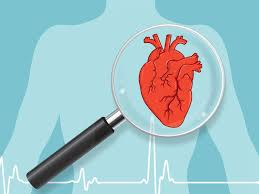

**The term "heart disease" is often used interchangeably with the term "cardiovascular disease." Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack, chest pain (angina) or stroke. Other heart conditions, such as those that affect your heart's muscle, valves or rhythm, also are considered forms of heart disease.**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style(style='darkgrid')
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree 
from sklearn import svm
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.model_selection import GridSearchCV
from math import sqrt

In [2]:
heart = pd.read_csv('../input/heart-disease-uci/heart.csv')

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Understanding all the columns**
- **age**,
- **sex**, 0 = female, 1 = male
- **cp**, chest pain, 0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic
- **trestbps**, resting blood pressure (in mm Hg)
- **chol**, serum cholesterol in mg/dl
- **fbs**, fasting blood sugar 0 = >=120 mg/dl , 1= <120 mg/dl 
- **restecg**, resting electrocardiographic results 1 = normal, 2 = having ST-T wave abnormality, 3 = showing probable or definite left ventricular hypertrophy
- **thalach**,  maximum heart rate achieved
- **exang**, exercise induced angina, 0 = no, 1 = yes
- **oldpeak**, ST depression induced by exercise relative to rest 1 = upsloping, 2 = flat, 3 = downsloping
- **slope**, the slope of the peak exercise ST segment,1 = upsloping, 2 = flat, 3 = downsloping
- **ca**, number of major vessels (0-3) colored by fluoroscopy
- **thal**, this is short of thalium heart scan, 3 = normal (no cold spots), 6 = fixed defect (cold spots during rest and exercise), 7 = reversible defect (when cold spots only appear during exercise)
- **target**, diagnosis of heart disease, the predicted attribute

In [4]:
heart.shape # To see now of rows and columns

(303, 14)

In [5]:
heart.describe() # StatisticalSummary

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart.isnull().sum() # Checking Missing Values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

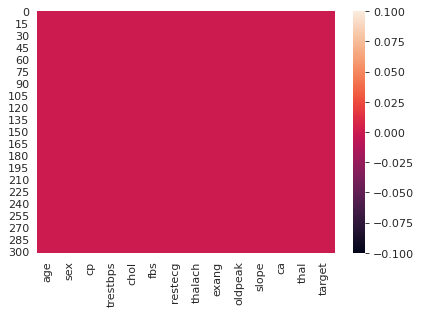

In [7]:
plt.figure(dpi=80)
sns.heatmap(heart.isnull())
plt.show()

In [8]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# **UNIVARIATE ANALYSIS**

<h2 style='color:red'><center>Let's do Univariate analysis to understand our columns better</center><h2>


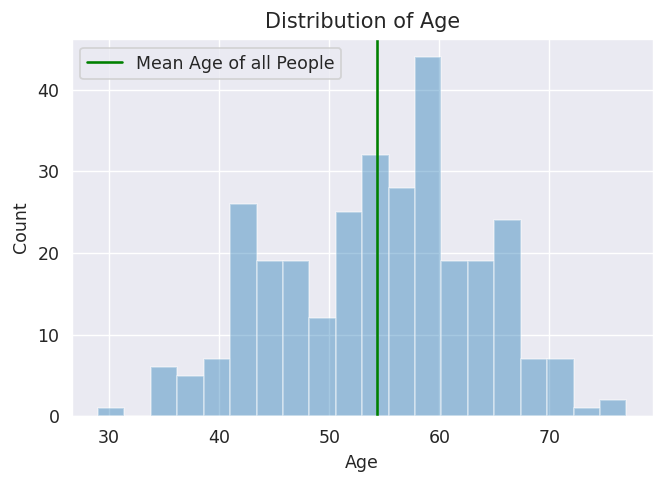

In [9]:
#Age
plt.figure(dpi=125)
sns.distplot(a=heart['age'],kde=False,bins=20)
plt.axvline(x=np.mean(heart['age']),c='green',label='Mean Age of all People')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

**So, There were 303 People out of which Mean Age is approx 54**

**Now, lets find the count of Sex distribution**

Female - 96
Male - 207


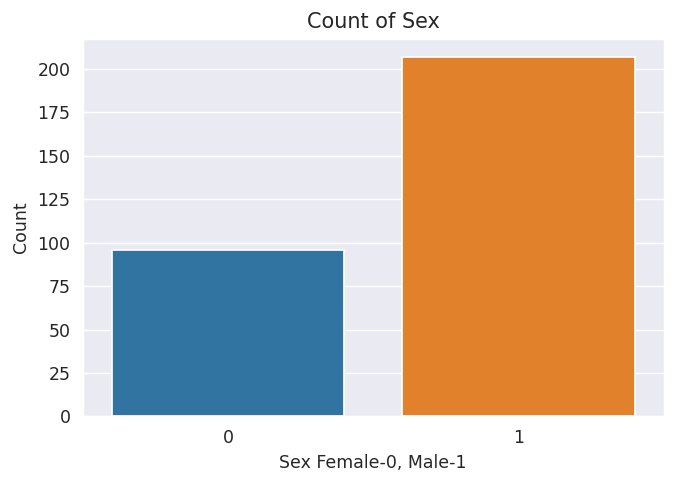

In [10]:
plt.figure(dpi=125)
male =len(heart[heart['sex'] == 1])
female = len(heart[heart['sex']== 0])
sns.countplot('sex',data = heart,)
plt.xlabel('Sex Female-0, Male-1')
plt.ylabel('Count')
plt.title('Count of Sex')
Male, Female =heart.sex.value_counts()
print('Female -',Female)
print('Male -',Male)
plt.show()

Typical Angina - 143
Atypical Angina - 50
Non-Anginal Pain - 87
Asymptomatic - 23


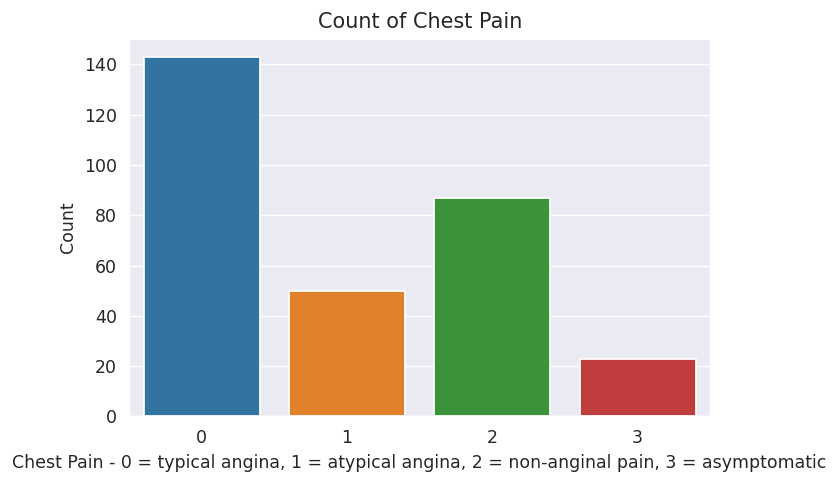

In [11]:
plt.figure(dpi=125)
sns.countplot('cp',data = heart,)
plt.xlabel('Chest Pain - 0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic')
plt.ylabel('Count')
plt.title('Count of Chest Pain')
A,B,C,D =heart.cp.value_counts()

print('Typical Angina -',A)
print('Atypical Angina -',C)
print('Non-Anginal Pain -',B)
print('Asymptomatic -',D)
 
plt.show()

Greater than 120 mg/dl - 258
Less than 120 mg/dl- 45


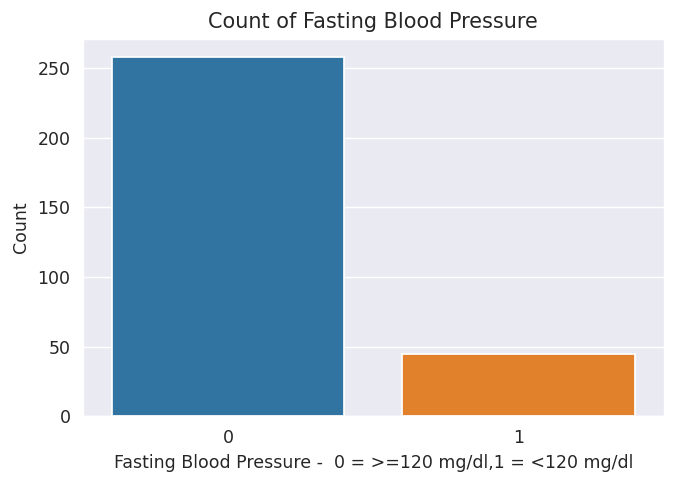

In [12]:
plt.figure(dpi=125)
sns.countplot('fbs',data = heart,)
plt.xlabel('Fasting Blood Pressure -  0 = >=120 mg/dl,1 = <120 mg/dl')
plt.ylabel('Count')
plt.title('Count of Fasting Blood Pressure')
A,B =heart.fbs.value_counts()

print('Greater than 120 mg/dl -',A)
print('Less than 120 mg/dl-',B)

 
plt.show()

No - 204
Yes - 99


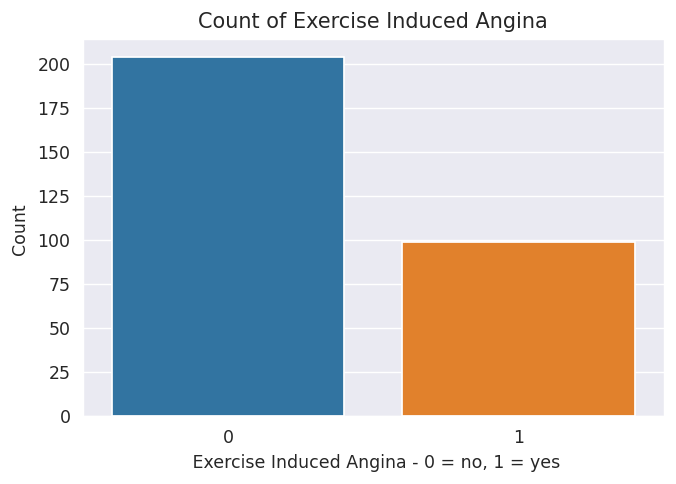

In [13]:
plt.figure(dpi=125)
sns.countplot('exang',data = heart,)
plt.xlabel(' Exercise Induced Angina - 0 = no, 1 = yes')
plt.ylabel('Count ')
plt.title('Count of Exercise Induced Angina')
A,B =heart.exang.value_counts()

print('No -',A)
print('Yes -',B)

 
plt.show()

# **BIVARIATE ANALYSIS**

<h2 style='color:red'><center>Let's do Bivariate analysis to understand the relationships between columns better</center><h2>

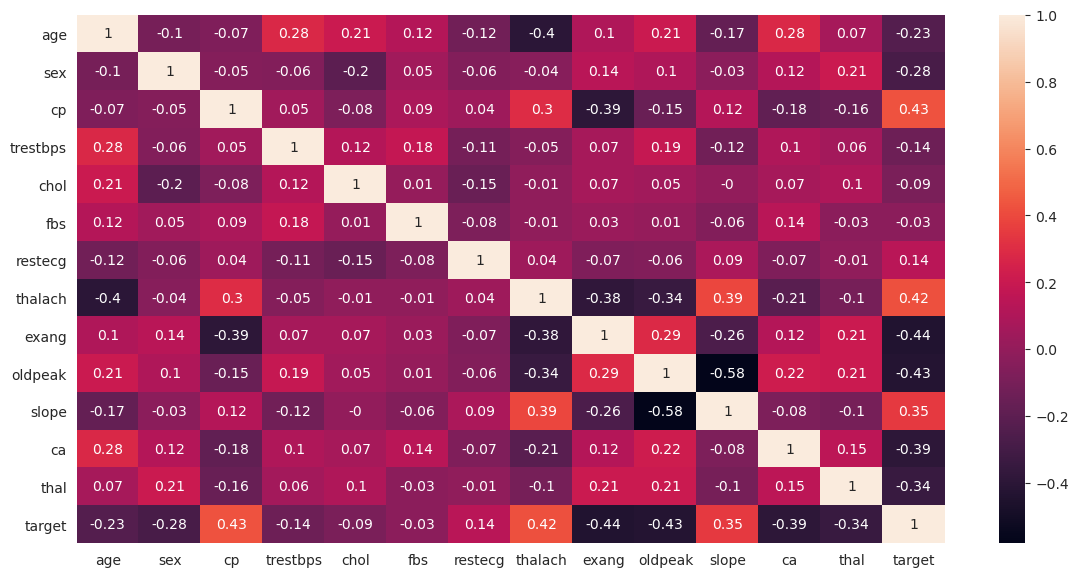

In [14]:
plt.figure(figsize=(14,7),dpi=100)
sns.heatmap(np.round(heart.corr(),2), annot = True)
plt.show()

**Let's analyse the relationship of Age with Cholesterol, Max Heart Rate and Resting Blood Pressure.**

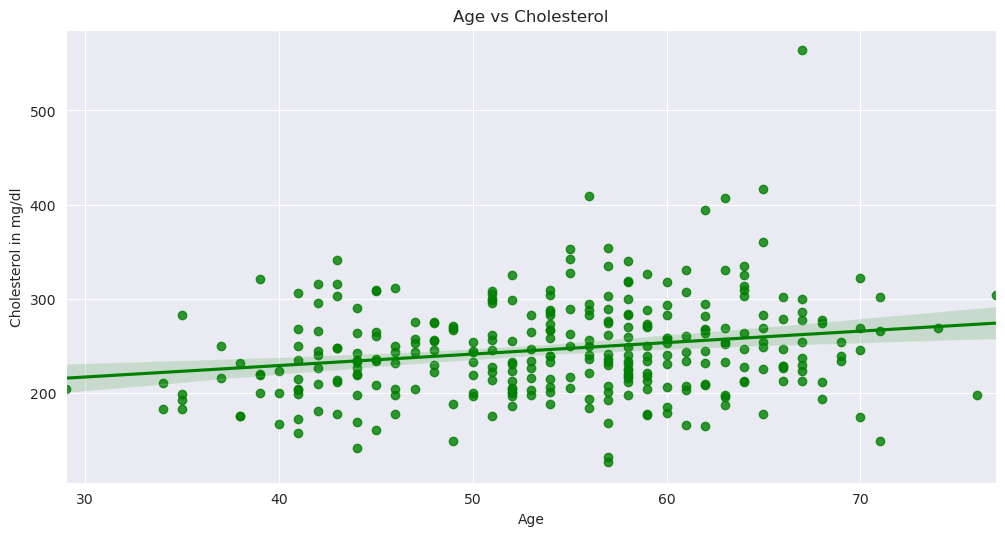

In [15]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='age',y='chol',data=heart,color='Green')
plt.xlabel('Age')
plt.ylabel('Cholesterol in mg/dl')
plt.title('Age vs Cholesterol')
plt.show()

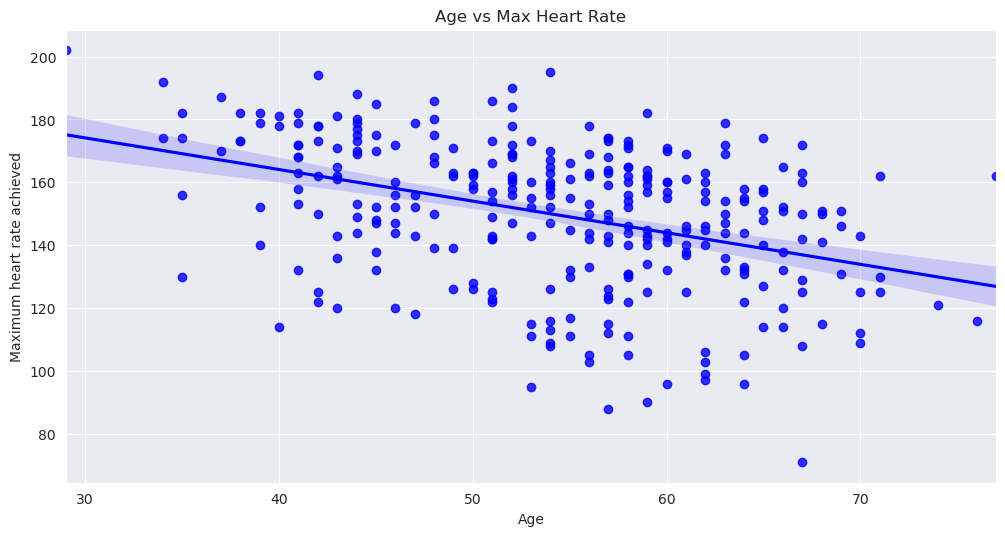

In [16]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='age',y='thalach',data=heart,color='Blue')
plt.xlabel('Age')
plt.ylabel('Maximum heart rate achieved')
plt.title('Age vs Max Heart Rate')
plt.show()

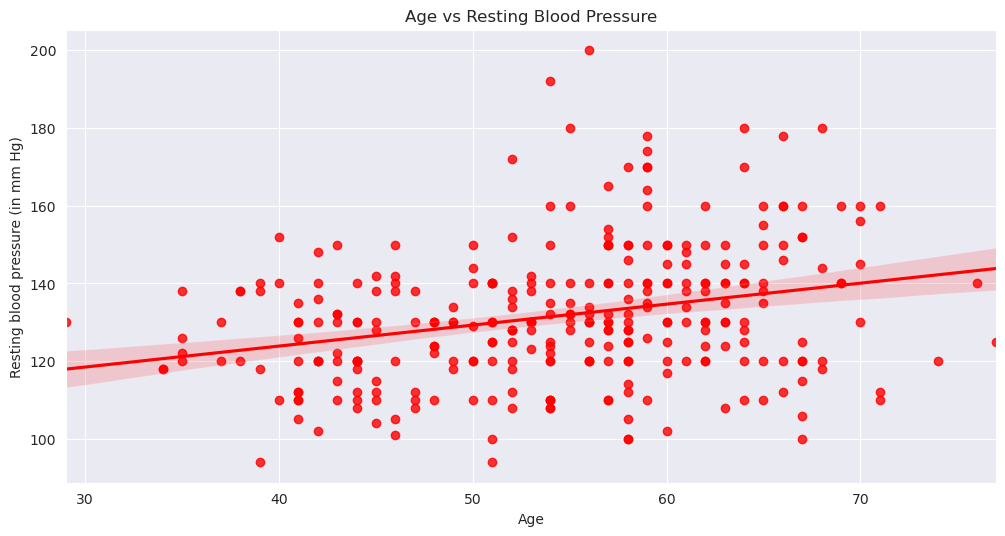

In [17]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='age',y='trestbps',data=heart,color='Red')
plt.xlabel('Age')
plt.ylabel('Resting blood pressure (in mm Hg)')
plt.title('Age vs Resting Blood Pressure')
plt.show()

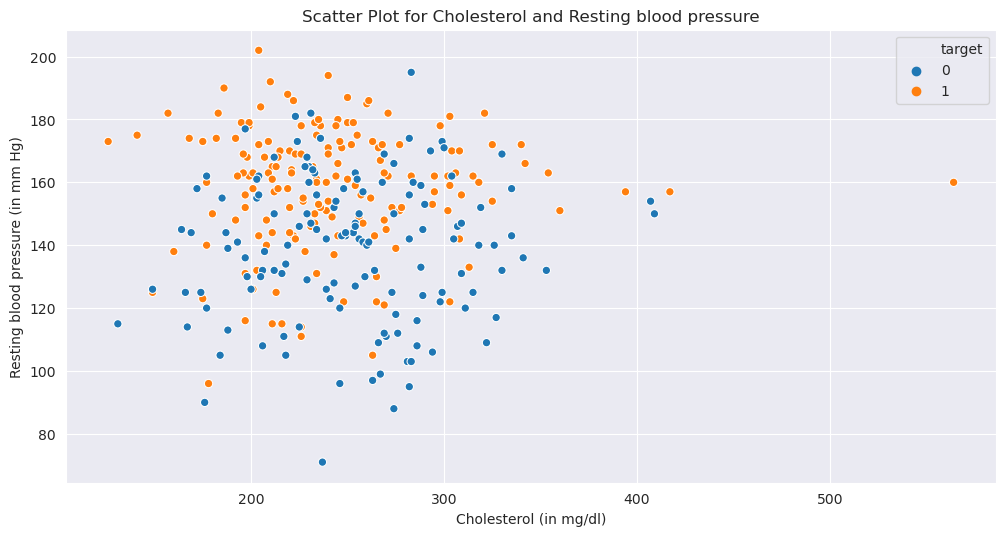

In [18]:
plt.figure(figsize=(12,6),dpi=100)
sns.scatterplot(x='chol',y='thalach',data=heart,hue='target')
plt.xlabel('Cholesterol (in mg/dl)')
plt.ylabel('Resting blood pressure (in mm Hg)')
plt.title('Scatter Plot for Cholesterol and Resting blood pressure')
plt.show()

**Now, Let's analyse the relationship of Sex with Cholesterol, Max Heart Rate and Resting Blood Pressure with respect to the Target**

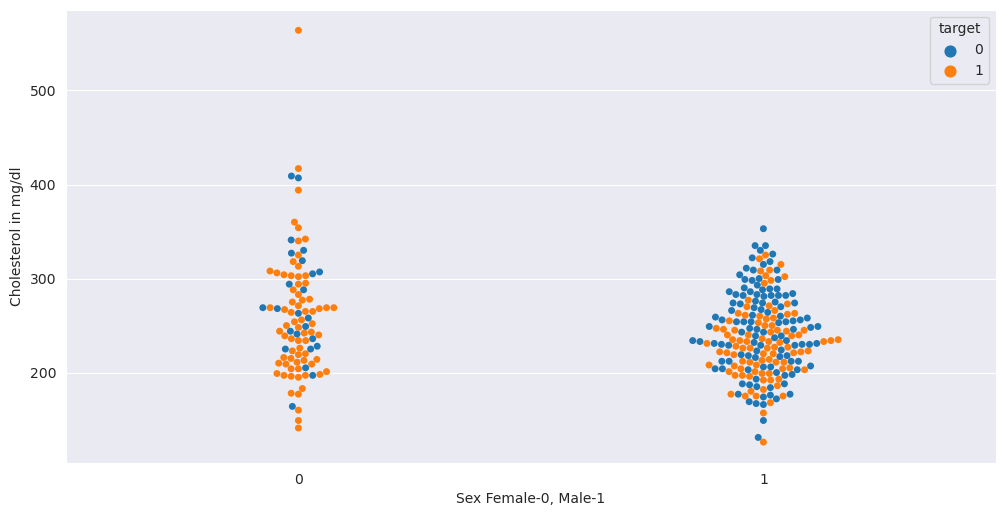

In [19]:
plt.figure(figsize=(12,6),dpi=100)
sns.swarmplot(x='sex',y='chol',data=heart,hue='target')
plt.xlabel('Sex Female-0, Male-1')
plt.ylabel('Cholesterol in mg/dl')
plt.show()

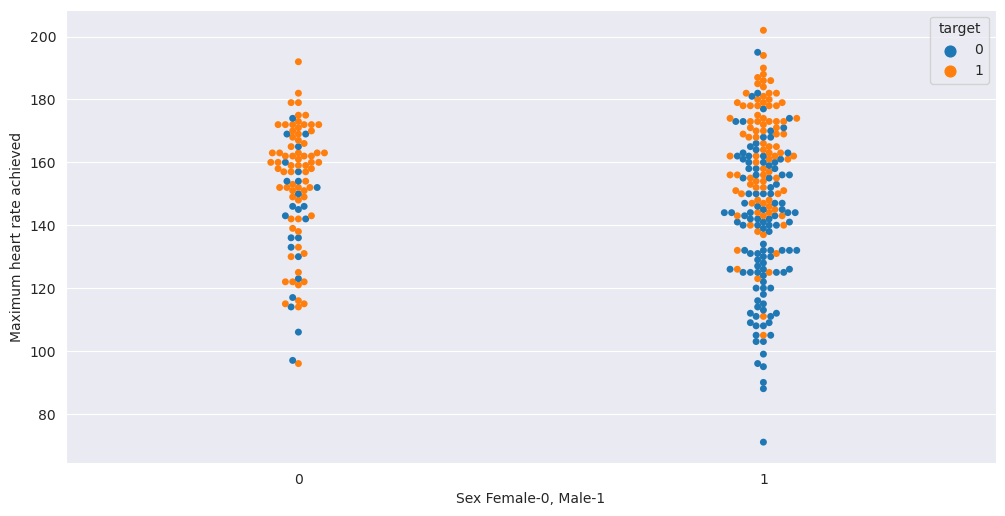

In [20]:
plt.figure(figsize=(12,6),dpi=100)
sns.swarmplot(x='sex',y='thalach',data=heart,hue='target',dodge=False)
plt.xlabel('Sex Female-0, Male-1')
plt.ylabel('Maximum heart rate achieved')
plt.show()

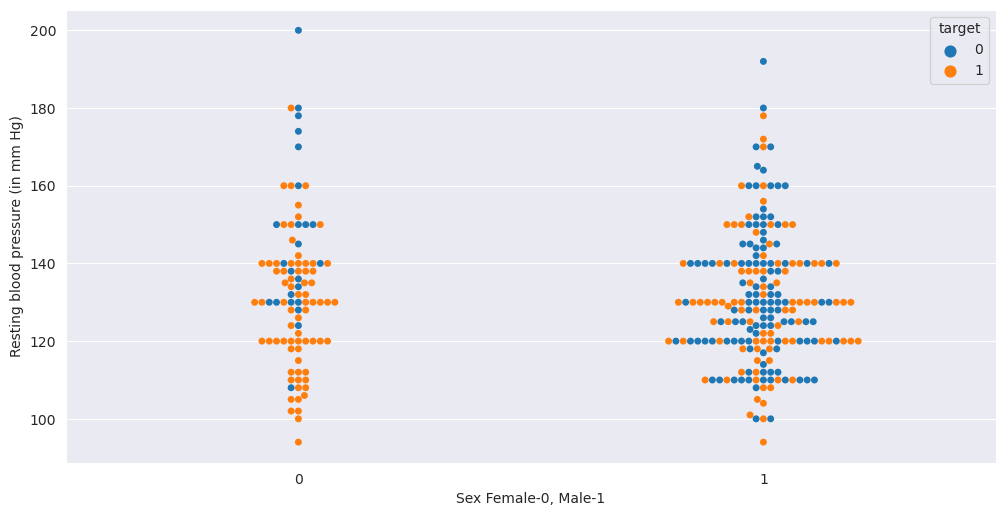

In [21]:
plt.figure(figsize=(12,6),dpi=100)
sns.swarmplot(x='sex',y='trestbps',data=heart,hue='target',dodge=False)
plt.xlabel('Sex Female-0, Male-1')
plt.ylabel('Resting blood pressure (in mm Hg)')
plt.show()

# **MODEL BUILDING**

**Since, it is a classification problem we need to choose a Classification algorithm.**

**Let's start with Decision Trees then we will move on to Logistic Regression and Random Forest.**

<h1 style='background:green; border:0; color:white'><center>DECISION TREE</center><h1>

In [22]:
X= heart.drop('target',axis=1)
y= heart['target']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

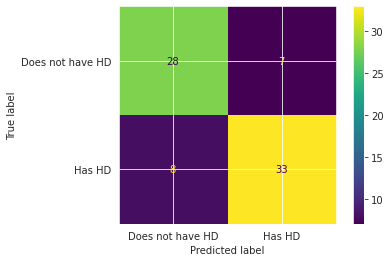

In [24]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

**Understanding the Confusion Matrix**

**Out of those 76 cases, the classifier predicted 'Has HD' 40 times, and 'Doesn't have' 36 times.**

**In reality, 41 patients in the sample have the Heart disease, and 35 patients do not.**

**Decision Trees are notorious for being overfit to the Training Dataset, so let's prune this tree in hopes that we can improve the accuracy with the Testing Dataset.**

**Pruning a decision tree is all about finding the right value for the pruning parameter, alpha, which controls how little or how much pruning happens. One way to find the optimal value for alpha is to plot the accuracy of the tree as a function of different values for alpha. We'll do this for both the Training Dataset and the Testing Dataset.**

In [25]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]

clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

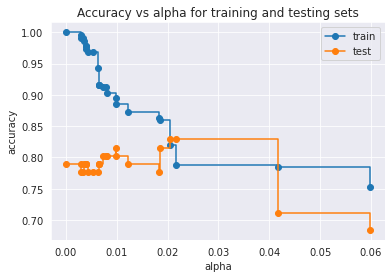

In [26]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [27]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, 
                                       ccp_alpha=0.02)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train) 

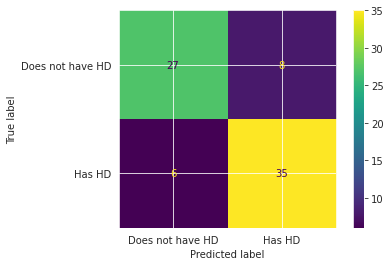

In [28]:
plot_confusion_matrix(clf_dt_pruned, 
                      X_test, 
                      y_test, 
                      display_labels=["Does not have HD", "Has HD"])

**Understanding the Confusion Matrix**

**Out of those 76 cases, the classifier predicted 'Has HD' 43 times, and 'Doesn't have' 33 times.**

**In reality, 41 patients in the sample have the Heart disease, and 35 patients do not.**

In [29]:
DT_score = clf_dt_pruned.score(X_test, y_test)
print("Decision Tree Accuracy:" , DT_score)

Decision Tree Accuracy: 0.8157894736842105


[Text(372.0, 356.7375, 'ca <= 0.5\ngini = 0.496\nsamples = 227\nvalue = [103, 124]\nclass = Yes HD'),
 Text(186.0, 254.8125, 'thal <= 2.5\ngini = 0.371\nsamples = 134\nvalue = [33, 101]\nclass = Yes HD'),
 Text(93.0, 152.8875, 'gini = 0.175\nsamples = 93\nvalue = [9, 84]\nclass = Yes HD'),
 Text(279.0, 152.8875, 'oldpeak <= 0.7\ngini = 0.485\nsamples = 41\nvalue = [24, 17]\nclass = No HD'),
 Text(186.0, 50.96249999999998, 'gini = 0.415\nsamples = 17\nvalue = [5, 12]\nclass = Yes HD'),
 Text(372.0, 50.96249999999998, 'gini = 0.33\nsamples = 24\nvalue = [19, 5]\nclass = No HD'),
 Text(558.0, 254.8125, 'cp <= 0.5\ngini = 0.372\nsamples = 93\nvalue = [70, 23]\nclass = No HD'),
 Text(465.0, 152.8875, 'gini = 0.105\nsamples = 54\nvalue = [51, 3]\nclass = No HD'),
 Text(651.0, 152.8875, 'slope <= 1.5\ngini = 0.5\nsamples = 39\nvalue = [19, 20]\nclass = Yes HD'),
 Text(558.0, 50.96249999999998, 'gini = 0.36\nsamples = 17\nvalue = [13, 4]\nclass = No HD'),
 Text(744.0, 50.96249999999998, 'gini 

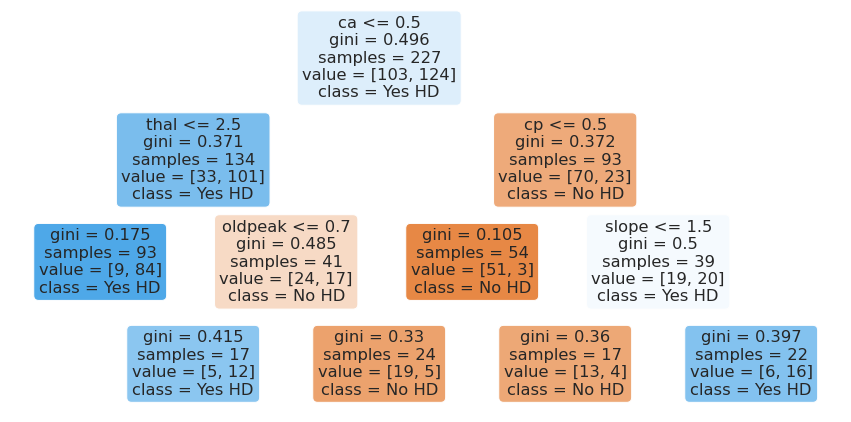

In [30]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned, 
          filled=True, 
          rounded=True, 
          class_names=["No HD", "Yes HD"], 
          feature_names=X.columns)

Now let's discuss how to interpret the tree.
In each node, we have:
- The variable (column name) and the threshold for splitting the observations. For example, in the tree's root, we use **ca** to split the observations. 
- **gini** is the gini index or score for that node
- **samples** tell us how many samples are in that node
- **value** tells us how many samples in the node are in each category. In this example, we have two categories, **No** and **Yes**, referring to whether or not a patient has heart disease. The number of patients with **No** comes first because the categories are in alphabetical order. Thus, in the root, 93 patients have **No** and 134 patients have **Yes**.
- **class** tells us whichever category is represented most in the node. 

The leaves are just like the nodes, except that they do not contain a variable and threshold for splitting the observations.

The nodes and leaves are colored by the **class**. In this case **No** is different shades of orange-ish and **Yes** is different shades of blue. 

The the darker the shade, the lower the **gini** score, and that tells us how much the node or leaf is skewed towards one class.

<h1 style='background:green; border:0; color:white'><center>LOGISTIC REGRESSION</center><h1>

**The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.**

**C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization. 
Now lets fit our model with train set.**

In [31]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [32]:
LR_score = LR.score(X_test, y_test)
print("Logistic Regression Accuracy:" ,LR_score)

Logistic Regression Accuracy: 0.868421052631579


In [33]:
ylr = LR.predict(X_test)

**Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.**

In [34]:
jaccard_score(y_test, ylr)

0.7872340425531915

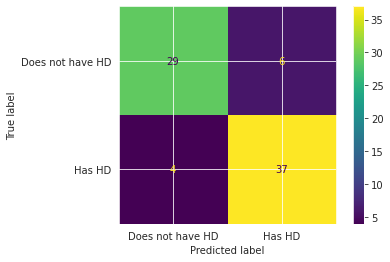

In [35]:
plot_confusion_matrix(LR, 
                      X_test, 
                      y_test, 
                      display_labels=["Does not have HD", "Has HD"])

**Understanding the Confusion Matrix**

**Out of those 76 cases, the classifier predicted 'Has HD' 43 times, and 'Doesn't have' 33 times.**

**In reality, 41 patients in the sample have the Heart disease, and 35 patients do not.**

In [36]:
print (classification_report(y_test, ylr))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.86      0.90      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
So, we can calculate precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

**The F1score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.**


And finally, we can tell the average accuracy for this classifier is the average of the f1-score for both labels, which is 0.87 in our case.

<h1 style='background:green; border:0; color:white'><center>RANDOM FOREST</center><h1>

**Now, let's try Random Forest and compare it with Logistic Regression in this case.**

In [37]:
rfc =  RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [38]:
print("Random Forest Accuracy: ", rfc.score(X_test,y_test))

Random Forest Accuracy:  0.8157894736842105


Trying to improve accuracy with Hyperparameter Tuning

Learned about the Hyperparamter Tuning of the Random Forest -

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [39]:
print('Parameters currently in use')
print(rfc.get_params())

Parameters currently in use
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [40]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [41]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [42]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [43]:
rfc_n =  RandomForestClassifier(n_estimators= 1000,min_samples_split = 5,min_samples_leaf = 2,max_depth = 20,bootstrap =True,random_state=42).fit(X_train, y_train)

In [44]:
RF_score = rfc_n.score(X_test,y_test)
print("Random Forest Accuracy: ", RF_score)

Random Forest Accuracy:  0.8289473684210527


# **MODEL ACCURACY COMPARISON**

In [45]:
data = [['Decision Tree', DT_score], ['Logistic Regression', LR_score], ['Random Forest', RF_score]] 
accuracy = pd.DataFrame(data,columns = ['Model', 'Accuracy',])
accuracy.head()

,Model,Accuracy
0,Decision Tree,0.815789
1,Logistic Regression,0.868421
2,Random Forest,0.828947


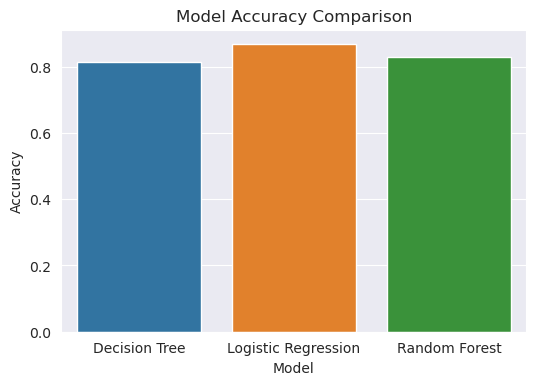

In [46]:
fig= plt.figure(dpi=100)
sns.barplot(x=accuracy['Model'],y=accuracy['Accuracy'])
plt.title('Model Accuracy Comparison')
plt.show()

**Clearly Here, Logistic Regression performed well even we did a lot of tuning in Random Forest.**

<h2 style='background:black; border:0; color:white'><center>THANK YOU !</center><h2>